# Trabalho Final - Algebra Linear e Aplicações

### Participantes:
#### Jorge Augusto Salgado Salhani
- No. USP: 8927418

#### Driely

## Tema Escolhido: 

## Estabilidade de Sistemas Dinâmicos: Funções de Lyapunov

### Visão Geral

#### Introdução

Sistenas dinâmicos consistem de variáveis que representam alguma entidade que desejamos descrever ao longo do tempo. Como a complexidade de qualquer objeto ou fenômeno físico que desejamos estudar é infinitamente grande no mundo real, precisamos reduzir o número de variáveis para que possamos estudá-lo. A este conjunto de parâmetros reduzidos que descrevem um certo fenômeno damos o nome de modelo.

Por representar a evolução de um fenômeno no tempo, um sistema dinâmico que modelamos pode ser descrito por meio de equações diferenciais. Esta forma de modelagem matemática é bastante visível em sistemas físicos que citamos em sequência.

Podemos considerar uma partícula em movimento retilíneo uniforme. Caso não haja forças atuantes sobre ela, temos

$$
x(t) = x_0 + v_0 t
$$

Por outro lado, caso seja uma partícula em movimento de queda, a equação que a descreve é dada por

$$
x(t) = x_0 + v_0 t + \frac{g t^2}{2}
$$

Onde, para ambas equações, $x_0 = x(t=0)$, $v_0 = v(t=0)$ e $g$ a aceleração da gravidade.

Por trás das equações de movimento acima, respectivamente, valem as seguintes formulações

$$
\frac{d x}{d t} = \dot{x} = v_0 \quad \quad \frac{d x}{d t} = \ddot{x} = \dot{v} = g
$$

Para a primeira, a velocidade é constante. Para a segunda, a aceleração (derivada temporal da velocidade, ou segunda derivada da posição $x$) é constante.

Outras equações diferenciais interessantes são

Sistema massa-mola simples:
$$
m\ddot{x}(t) + k x(t) = 0 \implies x(t) = x_0 + A cos(\sqrt{k/m} t)
$$

Sistema massa-mola amortecido:
$$
m\ddot{x}(t) + b\dot{x}(t) + k x = 0 \implies x(t) = x_0 + A e^{-(b/2m)t}cos(\sqrt{k/m} t)
$$

Equação de Schrodinger (mecânica quântica) simples:
$$
\frac{-\hslash^2}{2m} \frac{d^2 \psi(x)}{d x^2} = E \psi(x) \implies \psi(x) = A sin\Big(\frac{n \pi}{L} x \Big)
$$

Já fica evidente a grande ocorrência de equações diferenciais na representação de modelos físicos. Agora vamos motivar o estudo da estabilidade de sistemas com exemplos mais visuais.

Antes, no entanto, vale a pena mencionar que duas visualizações serão importantes: a evolução temporal de um dado sistema e seu espaço de fase.

A evolução temporal é a representação mais usual, ou seja, para cada instante de tempo $t$ um valor de $x(t)$ é calculado. Já o espaço de fase consiste na representação das variáveis $x(t)$ e sua derivada temporal (velocidade), ou seja $\dot{x}(t)$. A segunda representação será bastante útil para melhores análises da estabilidade do sistema.

Agora podemos verificar dois casos simples porém importantes. Para o caso do pêndulo simples, temos os seguintes resultados

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [36]:
# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # ganho
tau = 1.0   # constante tempo
zeta = 0.25 # fator de amortecimento
du = 1.0    # variação de u

def penduloSimples(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (- y + Kp*du)/tau**2
    return [dydt,dy2dt2]

def penduloAmortecido(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]

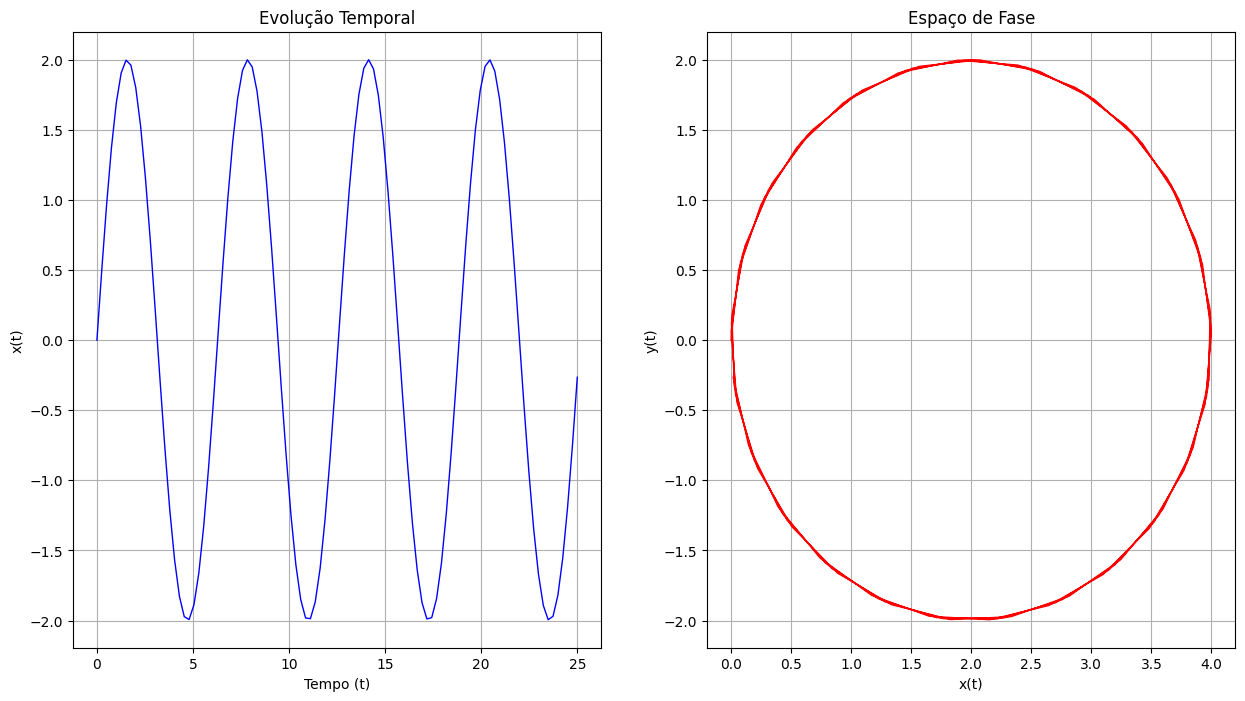

In [41]:
t3 = np.linspace(0,25,100)

PS = odeint(penduloSimples,[0,0],t3)

x3 = PS[:,0]
y3 = PS[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'r-',linewidth=1)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

plt.show()

Já para o pêndulo amortecido, temos os resultados

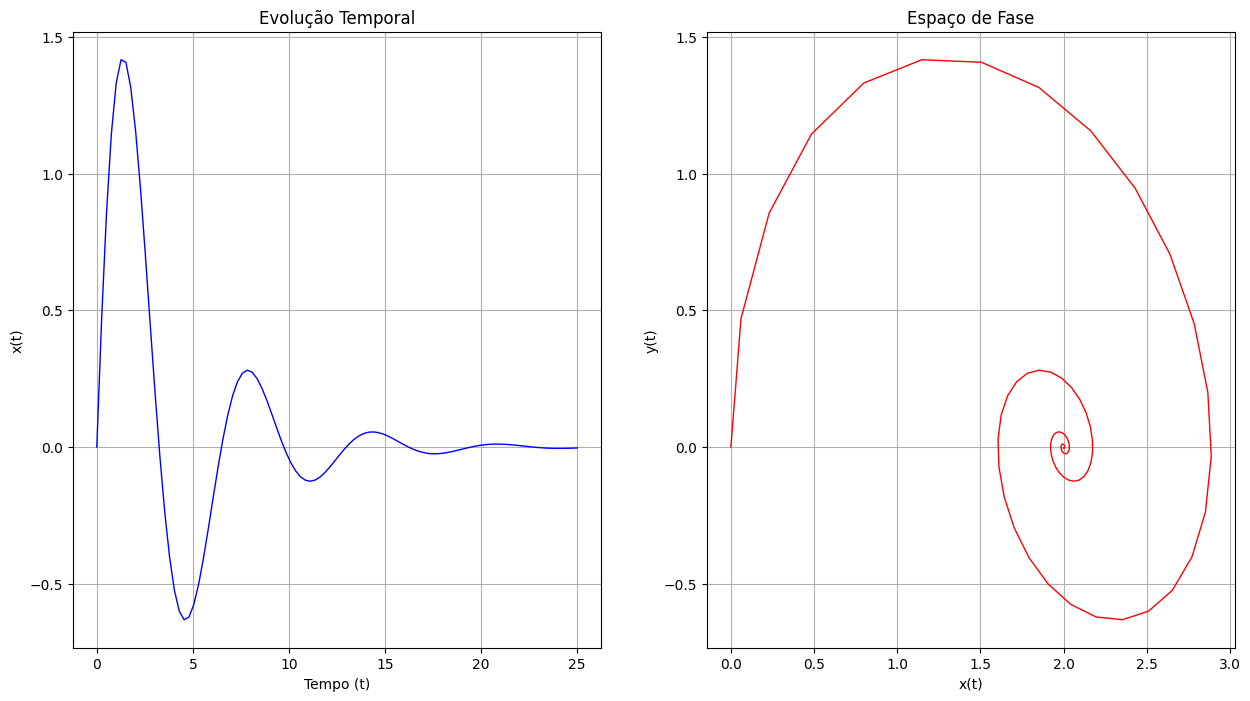

In [42]:
t3 = np.linspace(0,25,100)

PA = odeint(penduloAmortecido,[0,0],t3)

x3 = PA[:,0]
y3 = PA[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'r-',linewidth=1)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

plt.show()

Fica evidente que ambos apresentam formas de curva distintas, tanto para a evolução temporal quanto para o espaço de fase.

Para o caso simples, o pêndulo oscila indeterminadamente, mantendo a trajetória circular no espaço de fase. Já para o caso amortecido, o pêndulo oscila até parar, fazendo do ponto $[x(t), \dot{x}(t)] = [2,0]$ uma espécie de "dreno", responsável por estabilizar a dinâmica do sistema para um regime estável.

E aqui fica um pouco mais evidente a importância do estudo do tópico escolhido, ou seja, da estabilidade de sistemas dinâmicos. Como saber quais os pontos de estabilidade para sistemas que conehcemos ou não a sua evolução ao longo do tempo?

### Conexão com Álgebra Linear

### Problemas em Exemplo